In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('/content/fraudTrain.csv')
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
6723,6723,05-01-2019 10:22,3.716830e+14,fraud_Macejkovic-Lesch,shopping_pos,7.08,Debra,Becker,F,384 Jonathan Hills,...,40.5716,-74.3167,18459,Emergency planning/management officer,19-03-1929,0f9a36f5aaa099407b6a23e4304eaa2d,1325758965,39.672747,-74.970590,0.0
39,39,01-01-2019 00:29,4.789910e+15,"fraud_Mosciski, Gislason and Mertz",grocery_pos,221.81,Dorothy,Zuniga,F,77321 Ford Via,...,40.8095,-72.8229,3285,"Research officer, trade union",27-04-1988,a8394c3e555166ce2f90eee628bd9ade,1325377751,40.011959,-72.594808,0.0
11163,11163,07-01-2019 16:22,3.567700e+15,fraud_Cartwright-Harris,grocery_pos,66.50,John,Stevens,M,428 Morgan River,...,42.2470,-73.7552,17867,Travel agency manager,29-07-1998,03978a67301b4afaac0b6f663a890138,1325953330,42.767737,-74.159231,0.0
5227,5227,04-01-2019 09:54,4.906630e+18,fraud_Huel-Langworth,misc_net,2.83,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891,Town planner,13-02-1987,0697855ce4a85b7a9b1e6e1fc0037663,1325670868,25.586288,-80.793312,0.0
13390,13390,08-01-2019 15:18,3.513510e+15,fraud_Satterfield-Lowe,travel,3.84,Sarah,Adams,F,5654 Peterson Land,...,32.4122,-90.1207,24645,"Scientist, clinical (histocompatibility and im...",29-05-1966,e6cde5582344774cf352a41bbb441a30,1326035931,32.932683,-90.157599,0.0


In [3]:
def split_date(df):
  x=df.split(" ")
  date=x[0]

  return date
def split_time(df):
  x=df.split(" ")
  time=x[1]

  return time
df["date"]=df["trans_date_trans_time"] .apply(split_date)
df["time"]=df["trans_date_trans_time"] .apply(split_time)

df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
13798,13798,08-01-2019 18:50,3.529600e+15,fraud_Skiles LLC,home,70.53,Pamela,Curtis,F,8969 Fuentes Station Apt. 291,...,1334,Archaeologist,17-12-1986,348e05df24ffd1a81c24588d8a7883d9,1326048654,41.206062,-78.395539,0.0,08-01-2019,18:50
9924,9924,07-01-2019 02:51,6.540980e+15,fraud_Cole PLC,grocery_pos,98.62,Bryan,Torres,M,152 James Centers Apt. 768,...,673342,Retail manager,19-06-1967,bb583d8c5cf054898b4b1f0234a283fa,1325904691,41.611621,-83.688631,0.0,07-01-2019,02:51
11439,11439,07-01-2019 18:32,4.792630e+18,fraud_Stark-Batz,entertainment,227.26,Margaret,Mendez,F,7952 Karen Pike,...,5760,Chief Executive Officer,01-10-1978,3d0c5cfe1d056923aef78e64c20d9790,1325961123,39.919302,-94.830458,0.0,07-01-2019,18:32
3372,3372,02-01-2019 21:23,4.158010e+12,fraud_Ernser-Feest,home,21.41,Alicia,Miller,F,976 Hubbard Lodge,...,1201,Barrister,27-12-1979,5e8b8460e8e0efb3f33c2f75bc51e06f,1325539411,45.381553,-93.916399,0.0,02-01-2019,21:23
2766,2766,02-01-2019 09:49,4.646850e+18,fraud_Trantow PLC,grocery_net,40.57,Julia,Bell,F,576 House Crossroad,...,4056,Film/video editor,25-06-1990,eb84da712fa081de5642346985bfee8e,1325497750,40.701798,-72.962622,0.0,02-01-2019,09:49


In [4]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M')
df['hour'] = df['time'].apply(lambda x: x.hour)
df['time_of_day'] = pd.cut(df['hour'],
                           bins=[0, 6, 12, 18, 24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                           include_lowest=True)
df.sample(5)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,hour,time_of_day
8831,8831,06-01-2019 15:53,6.761950e+11,fraud_Medhurst PLC,shopping_net,4.19,Brandy,Quinn,F,9734 Beard Fields Suite 885,...,24-07-1983,7a6b80113d3b764dbd56df49485375b4,1325865214,30.462500,-96.272079,0.0,06-01-2019,1900-01-01 15:53:00,15,Afternoon
7510,7510,05-01-2019 22:06,3.589290e+15,"fraud_Dare, Fritsch and Zboncak",health_fitness,39.87,Paula,Estrada,F,350 Stacy Glens,...,05-03-1972,1a7c4b2171da4f70b78fd295fdcb1e95,1325801182,43.504058,-97.938318,0.0,05-01-2019,1900-01-01 22:06:00,22,Evening
9507,9507,06-01-2019 22:16,4.400010e+18,fraud_Schmidt-Larkin,home,38.08,Marissa,Powell,F,474 Allen Haven,...,15-09-1980,05856bccaf2c61cf8813e69a6fff1852,1325888170,41.494867,-99.060749,0.0,06-01-2019,1900-01-01 22:16:00,22,Evening
8553,8553,06-01-2019 12:59,6.390460e+11,fraud_Pollich LLC,home,81.16,Dylan,Bonilla,M,2497 John Motorway Suite 922,...,20-06-1986,0d0d9b6ad056d36d177c51813d54e1e7,1325854771,40.877186,-79.324906,0.0,06-01-2019,1900-01-01 12:59:00,12,Morning
15756,15756,10-01-2019 04:48,3.779930e+14,fraud_McDermott-Weimann,grocery_pos,60.23,Nathan,Martinez,M,586 Thomas Cliffs,...,11-09-1975,7fa64cd0ac05901647e8ba9e78657587,1326170929,44.954105,-88.320653,0.0,10-01-2019,1900-01-01 04:48:00,4,Night


In [5]:
df.merchant.nunique()

693

In [6]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                1
merch_long               1
is_fraud                 1
date                     0
time                     0
hour                     0
time_of_day              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace=True)

In [9]:
df["is_fraud"]=df["is_fraud"].apply(lambda x: int(x))

In [10]:
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,hour,time_of_day
6110,6110,04-01-2019 22:14,4.922710e+15,fraud_Schmidt and Sons,shopping_net,898.81,Heather,Chase,F,6888 Hicks Stream Suite 954,...,07-03-1941,d54162245d726a6d45cb6f4b8dc44501,1325715247,41.126312,-80.513488,1,04-01-2019,1900-01-01 22:14:00,22,Evening
1158,1158,01-01-2019 13:57,4.601640e+12,fraud_Crona and Sons,kids_pets,23.45,Mark,Rivera,M,383 Contreras Hills Suite 658,...,18-12-1990,f13bd7bd845c48d8f9ef90c26ecfd3a7,1325426251,30.489038,-95.966593,0,01-01-2019,1900-01-01 13:57:00,13,Afternoon
7546,7546,05-01-2019 22:28,2.229380e+15,"fraud_Dare, Casper and Bartoletti",kids_pets,47.46,Thomas,Hale,M,949 Smith Parkway,...,06-11-1984,ef24af281398690dcc4ac881d061dfba,1325802496,42.760826,-90.606122,0,05-01-2019,1900-01-01 22:28:00,22,Evening
7025,7025,05-01-2019 15:41,3.764450e+14,fraud_Kuhic LLC,shopping_net,1.27,Rachel,Lowe,F,372 Jeffrey Course,...,11-02-1982,30a4a1fb68b8d890782fc6f951409c8d,1325778113,42.056140,-100.927164,0,05-01-2019,1900-01-01 15:41:00,15,Afternoon
13004,13004,08-01-2019 11:56,4.171400e+15,"fraud_Jenkins, Hauck and Friesen",gas_transport,68.13,Ashley,Mcdonald,F,3160 Tina Estates Suite 234,...,06-10-1934,430f1ee2b24895d9db27c96d8242fd44,1326023768,35.344462,-82.604110,0,08-01-2019,1900-01-01 11:56:00,11,Morning


In [11]:
df["dob"]=pd.to_datetime(df["dob"],format="%d-%m-%Y")
def age_from_dob(dob):
  today=pd.to_datetime("today")
  age=today.year-dob.year-((today.month,today.day)<(dob.month,dob.day))
  return age
df["age"]=df["dob"].apply(age_from_dob)


In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'date', 'time', 'hour',
       'time_of_day', 'age'],
      dtype='object')

In [13]:
df.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street','date','time','lat','long', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)

In [14]:
df.sample(5)

,merchant,category,amt,gender,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour,time_of_day,age
8558,fraud_Kihn-Fritsch,food_dining,57.29,M,237282,Plant breeder/geneticist,1325854895,29.112227,-81.872174,0,13,Afternoon,74
1110,"fraud_Weimann, Kuhic and Beahan",shopping_pos,4.29,F,255,Chief Executive Officer,1325424903,39.274013,-80.383052,0,13,Afternoon,52
747,fraud_Kris-Padberg,shopping_pos,132.22,M,1453,Toxicologist,1325410692,41.658409,-77.818566,0,9,Morning,50
6058,"fraud_Metz, Russel and Metz",kids_pets,50.91,F,105638,"Librarian, public",1325713116,28.030625,-80.553203,0,21,Evening,38
1672,fraud_Watsica LLC,personal_care,69.36,M,140,"Development worker, community",1325440189,43.155188,-72.654298,0,17,Afternoon,34


<Axes: xlabel='is_fraud', ylabel='count'>

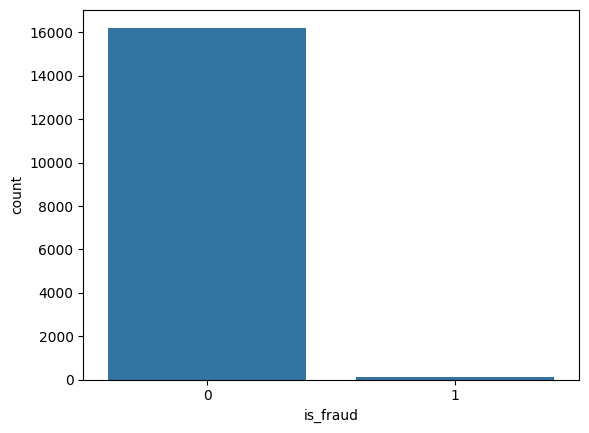

In [15]:
import seaborn as sns
sns.countplot(x=df["is_fraud"])

<Axes: xlabel='time_of_day'>

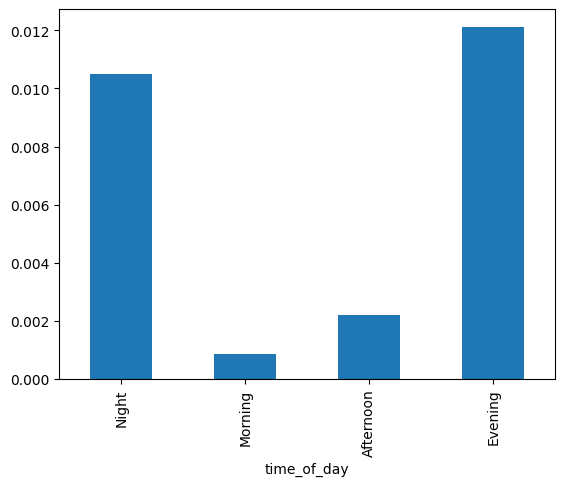

In [16]:
import matplotlib.pyplot as plt

fraud_by_time = df.groupby('time_of_day')['is_fraud'].mean()
fraud_by_time.plot(kind='bar')

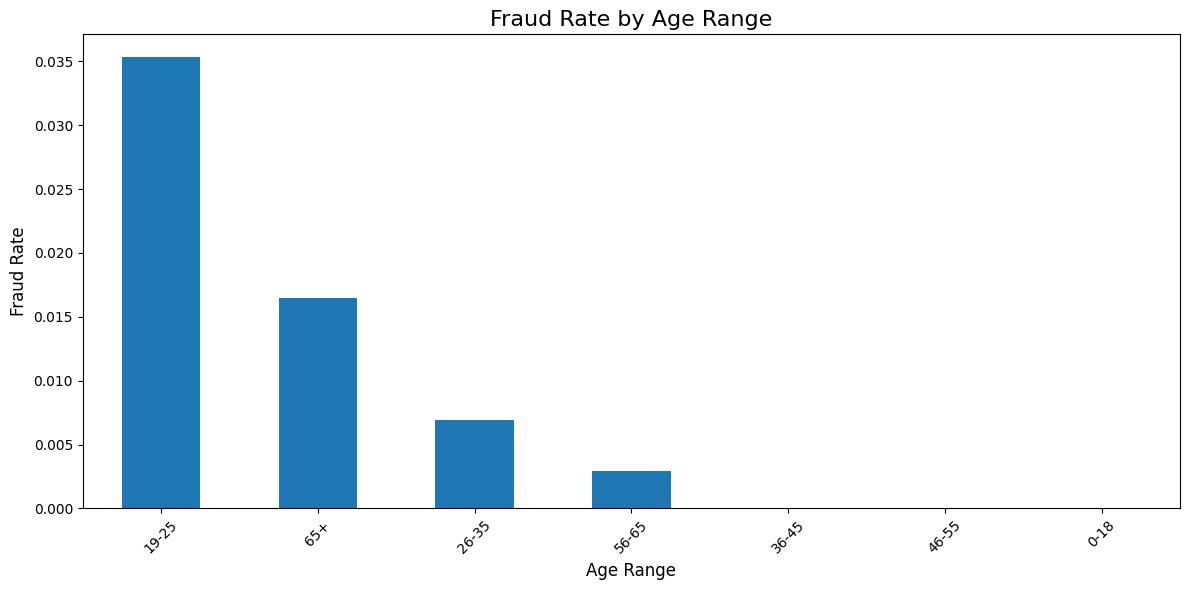

age_range
19-25    0.035346
65+      0.016455
26-35    0.006909
56-65    0.002903
36-45    0.000000
46-55    0.000000
0-18          NaN
Name: is_fraud, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df['age_range'] = pd.cut(df['age'],
                         bins=[0, 18, 25, 35, 45, 55, 65, 100],
                         labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+'])

fraud_by_age_range = df.groupby('age_range')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
fraud_by_age_range.plot(kind='bar')

plt.title('Fraud Rate by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

print(fraud_by_age_range)

<function matplotlib.pyplot.show(close=None, block=None)>

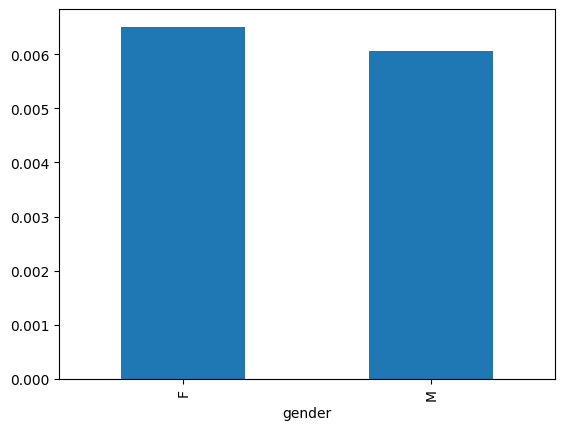

In [18]:
fraud_by_gender = df.groupby('gender')['is_fraud'].mean()
fraud_by_gender.plot(kind='bar')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

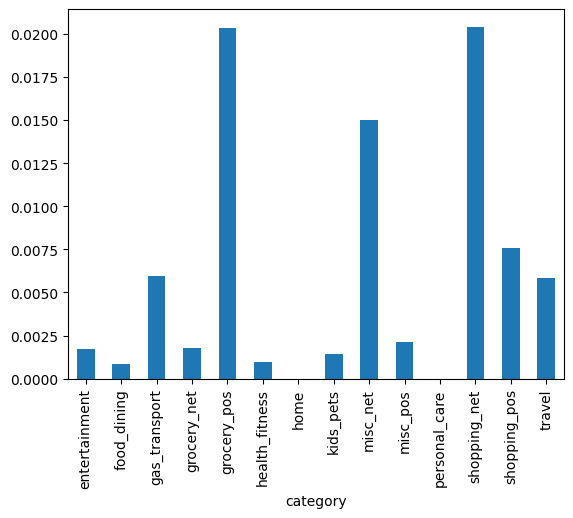

In [19]:
fraud_by_category = df.groupby('category')['is_fraud'].mean()
fraud_by_category.plot(kind='bar')
plt.xticks(rotation=90)
plt.show

In [20]:
print(df["job"].nunique())
print(df["merchant"].nunique())



475
693


In [21]:
df1 = df.copy()

value_counts1 = df1["merchant"].value_counts()
df1["merchant"] = df1["merchant"].apply(lambda x: "others" if value_counts1[x] < 1000 else x)
value_counts2 = df1["job"].value_counts()
df1["job"] = df1["job"].apply(lambda x: "others" if value_counts2[x] < 1000 else x)
df1.sample(5)


,merchant,category,amt,gender,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour,time_of_day,age,age_range
13150,others,home,46.84,F,922,others,1326027921,39.602744,-79.433849,0,13,Afternoon,51,46-55
5068,others,gas_transport,64.44,F,247,others,1325659358,36.153272,-105.048900,0,6,Night,62,56-65
10249,others,grocery_pos,219.56,F,21125,others,1325919441,40.055715,-74.451908,0,6,Night,39,36-45
808,others,gas_transport,44.69,F,70,others,1325412974,36.782047,-87.094603,0,10,Morning,68,65+
9454,others,entertainment,155.86,F,1178,others,1325886462,29.966626,-91.396808,0,21,Evening,73,65+


In [22]:
df1["merchant"].value_counts()

merchant
others    16325
Name: count, dtype: int64

In [23]:
print(df["job"].nunique())
print(df1["job"].nunique())

475
1


In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

import numpy as np
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(sparse=False, drop='first'), [ "category"]),
        ("tnf2", OrdinalEncoder(), ["gender"]),
        ("tnf3", OrdinalEncoder(categories=[["Morning", "Afternoon", "Evening", "Night"]]), ["time_of_day"])
    ],
    remainder="passthrough"
)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [25]:
import sys
import subprocess

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('category_encoders')

from category_encoders import TargetEncoder

In [26]:
X_encoded=transformer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
target_encode_cols = ['merchant', 'job']
te = TargetEncoder()
X_target_encoded = te.fit_transform(X[target_encode_cols], y)
X_final=np.hstack((X_encoded, X_target_encoded))

In [28]:
X_final

array([[0.0, 0.0, 0.0, ..., '36-45', 0.0022356753726642006,
        0.00036167780199592526],
       [0.0, 0.0, 0.0, ..., '46-55', 0.001956056872517973,
        2.836852285310492e-05],
       [0.0, 0.0, 0.0, ..., '56-65', 0.0026849874896416,
        0.00473364722060013],
       ...,
       [1.0, 0.0, 0.0, ..., '19-25', 0.002093516659520912,
        0.00029922602984927186],
       [0.0, 0.0, 0.0, ..., '36-45', 0.0033122729745991312,
        0.0007520919429266843],
       [0.0, 0.0, 0.0, ..., '36-45', 0.0013512402295017742,
        0.004958101271263922]], dtype=object)

In [29]:
import pandas as pd
import numpy as np

df_encoded = pd.DataFrame(X_final, columns=[f'feature_{i}' for i in range(X_final.shape[1])])

category_features = transformer.named_transformers_['tnf1'].get_feature_names_out(['category'])

column_names = (
    list(category_features) +
    ['gender', 'time_of_day'] +
    ['merchant', 'amt', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'age', 'age_range'] +
    ['merchant_encoded', 'job_encoded']
)


df_encoded.columns = column_names
print(df_encoded.head())
print("\nDataFrame Info:")
print(df_encoded.info())

print("\nColumn names:")
print(df_encoded.columns.tolist())


for col in ['merchant', 'amt', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'age', 'age_range']:
    print(f"\nSample values for {col}:")
    print(df_encoded[col].head())

print("\nSample values for merchant_encoded:")
print(df_encoded['merchant_encoded'].head())

print("\nSample values for job_encoded:")
print(df_encoded['job_encoded'].head())

  category_food_dining category_gas_transport category_grocery_net  \
0                  0.0                    0.0                  0.0   
1                  0.0                    0.0                  0.0   
2                  0.0                    0.0                  0.0   
3                  0.0                    1.0                  0.0   
4                  0.0                    0.0                  0.0   

  category_grocery_pos category_health_fitness category_home  \
0                  0.0                     0.0           0.0   
1                  1.0                     0.0           0.0   
2                  0.0                     0.0           0.0   
3                  0.0                     0.0           0.0   
4                  0.0                     0.0           0.0   

  category_kids_pets category_misc_net category_misc_pos  \
0                0.0               1.0               0.0   
1                0.0               0.0               0.0   
2             

In [30]:
df_encoded.sample(5)

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,...,city_pop,job,unix_time,merch_lat,merch_long,hour,age,age_range,merchant_encoded,job_encoded
2752,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,922,Early years teacher,1325496307,41.281329,-79.058698,9,51,46-55,0.004074,0.000247
10097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,565,Mental health nurse,1325912571,38.755763,-105.327983,5,45,36-45,0.002685,0.000629
12149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1700,"Engineer, land",1325982984,43.935327,-96.620329,0,22,19-25,0.004958,0.00106
13878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,973849,Geoscientist,1326051011,37.837642,-121.821965,19,27,26-35,0.002236,0.000138
8931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30770,Drilling engineer,1325868335,40.25954,-73.796215,16,31,26-35,0.002094,0.000138


In [31]:
df_encoded.columns

Index(['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender', 'time_of_day', 'merchant', 'amt', 'city_pop', 'job',
       'unix_time', 'merch_lat', 'merch_long', 'hour', 'age', 'age_range',
       'merchant_encoded', 'job_encoded'],
      dtype='object')

In [32]:
df_encoded.drop(columns=['city_pop', 'job',
       'unix_time', 'merch_lat', 'merch_long', 'hour', 'age_range','merchant'],axis=1,inplace=True)

In [33]:
df_encoded.sample(5)

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender,time_of_day,amt,age,merchant_encoded,job_encoded
2312,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,53.01,54,0.001248,0.003469
1637,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,72.97,48,0.002997,0.000575
11028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.37,23,0.003312,0.000299
3578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,7.4,87,0.027477,0.004353
13993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,8.86,52,0.002094,0.000629


In [34]:
df_test=pd.read_csv('/content/fraudTest.csv')
df_test.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
4889,4889,22-06-2020 18:08,4.809700e+12,"fraud_Gutmann, McLaughlin and Wiza",home,33.00,Sabrina,Nolan,F,312 Eric Expressway Apt. 014,...,32.4204,-85.0796,59744.0,Chemical engineer,07-02-1984,0559ad91961679464f46b772be01bb07,1.371924e+09,32.569746,-84.805328,0.0
18845,18845,28-06-2020 01:43,4.681600e+15,fraud_Schmeler Inc,misc_pos,460.73,Tammy,Davis,F,77663 Colleen Freeway,...,39.9148,-80.7310,16183.0,Physiotherapist,12-08-1977,50d7b206241c36e31b7a8e0888b4e151,1.372384e+09,39.598104,-80.222122,0.0
20327,20327,28-06-2020 14:16,4.646850e+18,fraud_Torphy-Goyette,shopping_pos,1.56,Julia,Bell,F,576 House Crossroad,...,40.7320,-73.1000,4056.0,Film/video editor,25-06-1990,00e21cd706d9de192afee3f55f56a358,1.372429e+09,41.134328,-72.463940,0.0
14520,14520,26-06-2020 07:22,3.003040e+13,fraud_Koepp-Witting,grocery_pos,102.76,William,Jenkins,M,50614 Kevin Point,...,30.2816,-99.2410,2395.0,"Pharmacist, community",17-11-1993,9c41e84b03a33bd0f491bae17dc7316c,1.372231e+09,30.524248,-98.949294,0.0
4372,4372,22-06-2020 15:36,6.538890e+15,"fraud_Towne, Greenholt and Koepp",shopping_net,4.99,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,36.0244,-90.9288,7155.0,"Engineer, control and instrumentation",23-03-1977,c85e5cae500a859971c86811590a121b,1.371915e+09,36.024495,-90.694752,0.0


In [35]:
def split_date(df_test):
  x=df_test.split(" ")
  date=x[0]

  return date
def split_time(df_test):
  x=df_test.split(" ")
  time=x[1]

  return time
df_test["date"]=df_test["trans_date_trans_time"] .apply(split_date)
df_test["time"]=df_test["trans_date_trans_time"] .apply(split_time)

df_test.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
941,941,21-06-2020 17:38,3.819900e+13,fraud_Ebert-Daugherty,travel,474.02,Jesse,Roberts,M,8415 Vaughn Squares Apt. 788,...,477.0,Naval architect,15-04-1988,ecd4f9577725ddd064835b7398145669,1.371836e+09,44.091739,-72.753032,0.0,21-06-2020,17:38
2105,2105,22-06-2020 00:50,4.449530e+15,fraud_Pagac LLC,shopping_pos,7.32,Felicia,Mckee,F,84079 Thomas Burgs,...,337.0,Occupational psychologist,05-07-1954,c4d946b47622b6a4b1c6a8349007dc61,1.371862e+09,38.342218,-122.332270,0.0,22-06-2020,00:50
5019,5019,22-06-2020 18:47,6.763690e+11,"fraud_Reichert, Shanahan and Hayes",shopping_net,6.08,David,Wolfe,M,81261 Garcia Underpass Suite 741,...,75830.0,"Engineer, automotive",28-12-1974,df278773c4234bfa813bccd37e4965cf,1.371927e+09,43.472654,-83.902274,0.0,22-06-2020,18:47
19174,19174,28-06-2020 04:51,2.131420e+14,fraud_Bauch-Raynor,grocery_pos,216.99,Margaret,Curtis,F,742 Oneill Shore,...,19685.0,Fine artist,24-12-1984,c4c6e28d009c182d69c246a87b67a76b,1.372395e+09,32.394844,-89.788891,0.0,28-06-2020,04:51
12976,12976,25-06-2020 14:43,3.540210e+15,fraud_Reilly and Sons,health_fitness,77.15,Steven,Yoder,M,94975 David Mews Apt. 316,...,53.0,Fisheries officer,19-06-1992,8aa2ea61145da979ade6cab6be02a869,1.372171e+09,35.524511,-103.208014,0.0,25-06-2020,14:43


In [36]:
df_test['time'] = pd.to_datetime(df_test['time'], format='%H:%M')
df_test['hour'] = df_test['time'].apply(lambda x: x.hour)
df_test['time_of_day'] = pd.cut(df_test['hour'],
                           bins=[0, 6, 12, 18, 24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                           include_lowest=True)
df_test.sample(5)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,hour,time_of_day
3106,3106,22-06-2020 08:27,6.544730e+15,fraud_Hackett-Lueilwitz,grocery_pos,55.12,John,Myers,M,701 Wilson Divide,...,08-02-1982,7832c3abd8cced9ba184b9262afa684f,1.371890e+09,42.153457,-87.197559,0.0,22-06-2020,1900-01-01 08:27:00,8,Morning
13969,13969,26-06-2020 00:43,3.597340e+15,"fraud_Turner, Ziemann and Lehner",food_dining,66.26,Linda,Gonzalez,F,17667 Price Spur Apt. 366,...,08-03-1952,e326c72458d79482c9b4bc546e7c078b,1.372207e+09,39.573423,-76.123889,0.0,26-06-2020,1900-01-01 00:43:00,0,Night
16709,16709,27-06-2020 05:35,3.523840e+15,"fraud_Casper, Hand and Zulauf",grocery_pos,99.11,Grace,Williams,F,28812 Charles Mill Apt. 628,...,20-11-1970,b47130cc6978ca4d533fc451d812e646,1.372311e+09,32.743934,-86.767397,0.0,27-06-2020,1900-01-01 05:35:00,5,Night
9347,9347,23-06-2020 20:35,4.279160e+12,fraud_Bechtelar-Rippin,food_dining,5.81,Lisa,Hendrix,F,35737 Kirby Fall Suite 409,...,16-08-1987,b43625ef76f1e141b98c045c175d2e9e,1.372020e+09,40.833477,-78.749394,0.0,23-06-2020,1900-01-01 20:35:00,20,Evening
2544,2544,22-06-2020 04:09,4.195740e+12,fraud_McGlynn-Heathcote,misc_net,5.80,Benjamin,Robinson,M,0701 John Ranch,...,04-04-1963,71b6beb9bec2312f9a61b9ce9a99ce28,1.371874e+09,45.164699,-122.275714,0.0,22-06-2020,1900-01-01 04:09:00,4,Night


In [37]:
df_test['time'] = pd.to_datetime(df_test['time'], format='%H:%M')
df_test['hour'] = df_test['time'].apply(lambda x: x.hour)
df_test['time_of_day'] = pd.cut(df_test['hour'],
                           bins=[0, 6, 12, 18, 24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                           include_lowest=True)
df_test.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,hour,time_of_day
9109,9109,23-06-2020 19:23,4.428780e+18,fraud_Bernier and Sons,kids_pets,200.38,Richard,Waters,M,7683 Natasha Way Apt. 945,...,02-01-1946,3b0a3e757cab99316be8de906e57e463,1.372015e+09,42.846236,-87.493070,0.0,23-06-2020,1900-01-01 19:23:00,19,Evening
15903,15903,26-06-2020 21:01,3.518670e+15,fraud_Conroy Ltd,shopping_pos,9.61,Dorothy,Thomas,F,537 Rice Square Suite 040,...,12-11-1996,97695538467fd18400a7ec9c6aadf9a8,1.372281e+09,38.206849,-85.099605,0.0,26-06-2020,1900-01-01 21:01:00,21,Evening
8461,8461,23-06-2020 16:21,3.764450e+14,fraud_Kub-Heaney,health_fitness,61.84,Rachel,Lowe,F,372 Jeffrey Course,...,11-02-1982,aa30b3da2b7483c26cb5062f6f4bd1f7,1.372004e+09,40.936316,-100.534421,0.0,23-06-2020,1900-01-01 16:21:00,16,Afternoon
7332,7332,23-06-2020 09:36,6.592070e+15,fraud_Rau and Sons,grocery_pos,250.90,Amanda,Molina,F,8425 Daniel Knolls Suite 288,...,23-05-1972,c391f3ed5fb384225996e08eeebf6f38,1.371980e+09,40.695333,-75.072580,0.0,23-06-2020,1900-01-01 09:36:00,9,Morning
15467,15467,26-06-2020 16:57,4.767270e+15,"fraud_Nicolas, Hills and McGlynn",entertainment,39.07,Jennifer,Conner,F,4655 David Island,...,19-06-1961,7a0b3930083a878dd16f202f7c1711ab,1.372266e+09,39.803890,-74.487313,0.0,26-06-2020,1900-01-01 16:57:00,16,Afternoon


In [38]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
date                     0
time                     0
hour                     0
time_of_day              0
dtype: int64

In [39]:
df_test.dropna(inplace=True)

In [40]:
df_test["is_fraud"]=df_test["is_fraud"].apply(lambda x: int(x))

In [41]:
df_test["dob"]=pd.to_datetime(df_test["dob"],format="%d-%m-%Y")
def age_from_dob(dob):
  today=pd.to_datetime("today")
  age=today.year-dob.year-((today.month,today.day)<(dob.month,dob.day))
  return age
df_test["age"]=df_test["dob"].apply(age_from_dob)


In [42]:
df_test.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street','date','time','lat','long', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)

In [43]:
df_test['age_range'] = pd.cut(df_test['age'],
                         bins=[0, 18, 25, 35, 45, 55, 65, 100],
                         labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+'])

In [44]:
value_counts1 = df_test["merchant"].value_counts()
df_test["merchant"] = df_test["merchant"].apply(lambda x: "others" if value_counts1[x] < 100 else x)
value_counts2 = df_test["job"].value_counts()
df_test["job"] = df_test["job"].apply(lambda x: "others" if value_counts2[x] < 100 else x)
df_test.sample(5)

,merchant,category,amt,gender,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour,time_of_day,age,age_range
19200,others,shopping_net,8.18,M,1766.0,others,1.372396e+09,42.542232,-78.084803,0,5,Night,62,56-65
9502,others,shopping_pos,3.52,M,17867.0,others,1.372023e+09,41.975136,-72.868467,0,21,Evening,25,19-25
15262,others,personal_care,18.94,M,4729.0,others,1.372260e+09,36.991151,-83.047055,0,15,Afternoon,42,36-45
11942,others,gas_transport,59.71,F,15426.0,others,1.372123e+09,45.110677,-89.604513,0,1,Night,87,65+
13131,others,shopping_pos,313.55,F,19685.0,others,1.372177e+09,32.324166,-90.658376,0,16,Afternoon,39,36-45


In [45]:


transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(sparse=False, drop='first'), [ "category"]),
        ("tnf2", OrdinalEncoder(), ["gender"]),
        ("tnf3", OrdinalEncoder(categories=[["Morning", "Afternoon", "Evening", "Night"]]), ["time_of_day"])
    ],
    remainder="passthrough"
)
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

In [46]:
X_encoded_test=transformer.fit_transform(X_test)
target_encode_cols = ['merchant', 'job']
te = TargetEncoder()
X_target_encoded_test = te.fit_transform(X_test[target_encode_cols], y_test)
X_final_test=np.hstack((X_encoded_test, X_target_encoded_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
df_encoded_test = pd.DataFrame(X_final_test, columns=[f'feature_{i}' for i in range(X_final_test.shape[1])])


category_features = transformer.named_transformers_['tnf1'].get_feature_names_out(['category'])

column_names = (
    list(category_features) +
    ['gender', 'time_of_day'] +
    ['merchant', 'amt', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'age', 'age_range'] +
    ['merchant_encoded', 'job_encoded']
)


df_encoded_test.columns = column_names


print(df_encoded_test.head())
print("\nDataFrame Info:")
print(df_encoded_test.info())


print("\nColumn names:")
print(df_encoded_test.columns.tolist())

for col in ['merchant', 'amt', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'age', 'age_range']:
    print(f"\nSample values for {col}:")
    print(df_encoded_test[col].head())

print("\nSample values for merchant_encoded:")
print(df_encoded_test['merchant_encoded'].head())

print("\nSample values for job_encoded:")
print(df_encoded_test['job_encoded'].head())

  category_food_dining category_gas_transport category_grocery_net  \
0                  0.0                    0.0                  0.0   
1                  0.0                    0.0                  0.0   
2                  0.0                    0.0                  0.0   
3                  0.0                    0.0                  0.0   
4                  0.0                    0.0                  0.0   

  category_grocery_pos category_health_fitness category_home  \
0                  0.0                     0.0           0.0   
1                  0.0                     0.0           0.0   
2                  0.0                     1.0           0.0   
3                  0.0                     0.0           0.0   
4                  0.0                     0.0           0.0   

  category_kids_pets category_misc_net category_misc_pos  \
0                0.0               0.0               0.0   
1                0.0               0.0               0.0   
2             

In [48]:
df_encoded_test.drop(columns=['city_pop', 'job',
       'unix_time', 'merch_lat', 'merch_long', 'hour', 'age_range','merchant'],axis=1,inplace=True)
df_encoded_test.sample(5)

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender,time_of_day,amt,age,merchant_encoded,job_encoded
5774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,21.86,58,0.003337,0.002937
8508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,165.05,36,0.003337,0.002937
6180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4.34,56,0.003337,0.002937
15748,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.08,36,0.003337,0.002937
15450,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.3,68,0.003337,0.002937


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit

In [50]:
model=RandomForestClassifier()
model.fit(df_encoded,y)
y_pred=model.predict(df_encoded_test)
print(accuracy_score(y_test,y_pred))

0.9966633954857703


In [51]:
def find_best_score(x,y):
  algos={"logistic":{"model":LogisticRegression(),
                     "params":{"solver":["liblinear"]}},
         "decision_tree":{"model":DecisionTreeClassifier(),
                          "params":{"criterion":["gini","entropy"]}},
         "random_forest":{"model":RandomForestClassifier(),
         "params":{"criterion":["gini","entropy"]}}}
  scores=[]
  cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algos_name,config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(x,y)
    scores.append({
          'model':algos_name,
          'best_score':gs.best_score_,
          'best_params':gs.best_params_
      })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_score(df_encoded,y)

,model,best_score,best_params
0,logistic,0.993568,{'solver': 'liblinear'}
1,decision_tree,0.998897,{'criterion': 'entropy'}
2,random_forest,0.998959,{'criterion': 'entropy'}


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20312
           1       0.00      0.00      0.00        68

    accuracy                           1.00     20380
   macro avg       0.50      0.50      0.50     20380
weighted avg       0.99      1.00      0.99     20380

[[20312     0]
 [   68     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote=SMOTE()

In [55]:
df_encoded,y=smote.fit_resample(df_encoded,y)
rf=RandomForestClassifier()
rf.fit(df_encoded,y)
y_pred=rf.predict(df_encoded_test)


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20312
           1       0.00      0.00      0.00        68

    accuracy                           1.00     20380
   macro avg       0.50      0.50      0.50     20380
weighted avg       0.99      1.00      0.99     20380



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
